# <span style="color:yellow">Actividad Modular 10</span>
##### Nombre: Javier Medina M

## <span style="color:green">"MLOps en la Nube: Despliegue automatizado de un modelo predictivo real"</span>

- Objetivo:   
    Desarrollar  un  sistema  completo  que  integre  un  modelo  de  Machine  Learning  (clasificación  o regresión), exponerlo como API REST mediante Flask, contenedorizado con Docker, y con un flujo básico  de  CI/CD  para  automatizar  pruebas  y  despliegues  locales.  Se  espera  demostrar  buenas prácticas de versionado, empaquetado y documentación.  

### <span style="color:green">Contexto:</span>

Has  sido  contratado  por  una  fintech/startup  de  salud  para  integrar  un  modelo  de  predicción (puede  ser  de  scoring  de  crédito  o  diagnóstico  preventivo)  dentro  de  su  infraestructura tecnológica. Necesitan que este servicio sea: 
- Escalable localmente mediante contenedores 
- Fácil de actualizar 
- Accesible vía REST 
- Documentado y probado con CI/CD

### <span style="color:green">Requerimiento:</span>

#### <span style="color:blue">1. Modelo Predictivo:</span>

- Dataset a utilizar: 
  - Salud: Breast Cancer (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data )  
  -  Entrenar y guardar el modelo usando joblib, pickle o .h5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [6]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [9]:
# Detectar columnas categóricas y numéricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

In [10]:
print("Columnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)

Columnas categóricas: ['diagnosis']
Columnas numéricas: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [11]:
# Dividir dataset
X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Convertir a binario

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
from sklearn.pipeline import Pipeline

In [15]:
# Pipeline de preprocesamiento 
preprocessor = ColumnTransformer( 
    transformers=[ 
        ('num', StandardScaler(), num_cols) 
        ] 
)

In [16]:
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

In [17]:
# Entrenar el modelo
clf.fit(X_train, y_train)

c:\Users\medin\OneDrive\Escritorio\Especialidad_Machine_Learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:56:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

In [19]:
def evaluate_model(model, X, y, dataset_name="Dataset"):
    # Predicciones
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Métricas
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred_proba)
    
    # Reporte de métricas
    print(f"\n📊 Evaluación en {dataset_name}")
    print("-"*50)
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {roc_auc:.4f}")
    print("\nReporte de clasificación completo:")
    print(classification_report(y, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Benigno", "Maligno"],
                yticklabels=["Benigno", "Maligno"])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - {dataset_name}")
    plt.show()
    
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": roc_auc}


📊 Evaluación en Train
--------------------------------------------------
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
ROC-AUC  : 1.0000

Reporte de clasificación completo:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



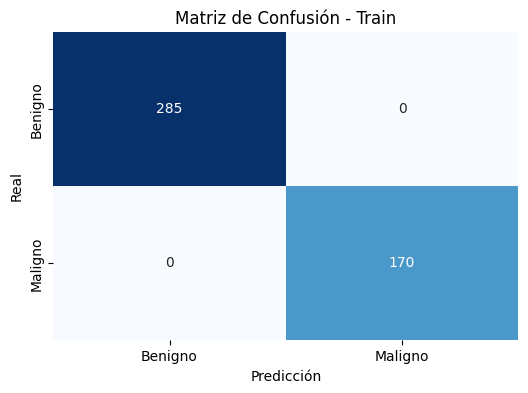

In [28]:
train_metrics = evaluate_model(clf, X_train, y_train, dataset_name="Train")


📊 Evaluación en Test
--------------------------------------------------
Accuracy : 0.9737
Precision: 1.0000
Recall   : 0.9286
F1-score : 0.9630
ROC-AUC  : 0.9940

Reporte de clasificación completo:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



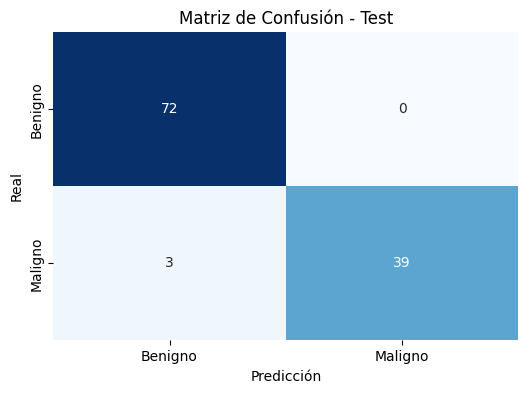

In [29]:
test_metrics = evaluate_model(clf, X_test, y_test, dataset_name="Test")

Guardar El Modelo

In [42]:
from pathlib import Path
import json, os, joblib, platform
from datetime import datetime
import sklearn
import xgboost

In [30]:
# Paths
ARTIFACTS_DIR = Path("artifacts")
ARTIFACTS_DIR.mkdir(exist_ok=True)

In [45]:
# Guardado del modelo usando joblib
model_path = ARTIFACTS_DIR / "model_xgboost.pkl"
joblib.dump(clf, model_path)

# Manifest
manifest = {
    "model_name": "breast_cancer_xgboost",
    "version": "1.0.0",
    "artifact_path": str(model_path.resolve()),
    "framework": "xgboost",
    "pipeline_type": str(type(clf)),
    "metrics": {
        "train": train_metrics,
        "test": test_metrics
    },
    "created_at": datetime.now().isoformat(),
    "dependencies": {
        "scikit-learn": sklearn.__version__,
        "xgboost": xgboost.__version__
    }
}

# Guardar manifest.json
manifest_path = ARTIFACTS_DIR / "manifest.json"
with open(manifest_path, "w") as f:
    json.dump(manifest, f, indent=4)

print("✅ Modelo y manifest guardados en:")
print(" -", model_path.resolve())
print(" -", manifest_path.resolve())

✅ Modelo y manifest guardados en:
 - C:\Users\medin\OneDrive\Escritorio\Especialidad_Machine_Learning\M_10\Session_4\artifacts\model_xgboost.pkl
 - C:\Users\medin\OneDrive\Escritorio\Especialidad_Machine_Learning\M_10\Session_4\artifacts\manifest.json


#### <span style="color:blue">2. API con Flask :</span>

- Crear una API con al menos dos rutas: 
  - GET /: para probar el estado del servicio 
  - POST /predict: para recibir un JSON y retornar predicción 
- Validación de entradas, manejo de errores, logging

In [57]:
tests = [
    {
        "radius_mean": 17.99, "texture_mean": 10.38, "perimeter_mean": 122.8, "area_mean": 1001.0,
        "smoothness_mean": 0.1184, "compactness_mean": 0.2776, "concavity_mean": 0.3001,
        "concave points_mean": 0.1471, "symmetry_mean": 0.2419, "fractal_dimension_mean": 0.07871,
        "radius_se": 1.095, "texture_se": 0.9053, "perimeter_se": 8.589, "area_se": 153.4,
        "smoothness_se": 0.006399, "compactness_se": 0.04904, "concavity_se": 0.05373,
        "concave points_se": 0.01587, "symmetry_se": 0.03003, "fractal_dimension_se": 0.006193,
        "radius_worst": 25.38, "texture_worst": 17.33, "perimeter_worst": 184.6, "area_worst": 2019.0,
        "smoothness_worst": 0.1622, "compactness_worst": 0.6656, "concavity_worst": 0.7119,
        "concave points_worst": 0.2654, "symmetry_worst": 0.4601, "fractal_dimension_worst": 0.1189
    },
    {
        "radius_mean": 13.54, "texture_mean": 14.36, "perimeter_mean": 87.46, "area_mean": 566.3,
        "smoothness_mean": 0.09779, "compactness_mean": 0.08129, "concavity_mean": 0.06664,
        "concave points_mean": 0.04781, "symmetry_mean": 0.1885, "fractal_dimension_mean": 0.05766,
        "radius_se": 0.757, "texture_se": 0.7813, "perimeter_se": 5.438, "area_se": 62.36,
        "smoothness_se": 0.003532, "compactness_se": 0.01308, "concavity_se": 0.01332,
        "concave points_se": 0.009201, "symmetry_se": 0.0189, "fractal_dimension_se": 0.002657,
        "radius_worst": 15.92, "texture_worst": 19.48, "perimeter_worst": 107.0, "area_worst": 857.1,
        "smoothness_worst": 0.1259, "compactness_worst": 0.191, "concavity_worst": 0.1661,
        "concave points_worst": 0.07489, "symmetry_worst": 0.2871, "fractal_dimension_worst": 0.07039
    },
    {
        "radius_mean": 12.46, "texture_mean": 15.64, "perimeter_mean": 82.0, "area_mean": 477.1,
        "smoothness_mean": 0.09353, "compactness_mean": 0.07938, "concavity_mean": 0.05903,
        "concave points_mean": 0.03544, "symmetry_mean": 0.1809, "fractal_dimension_mean": 0.05639,
        "radius_se": 0.589, "texture_se": 0.9138, "perimeter_se": 4.522, "area_se": 38.38,
        "smoothness_se": 0.003532, "compactness_se": 0.009069, "concavity_se": 0.01004,
        "concave points_se": 0.005998, "symmetry_se": 0.01628, "fractal_dimension_se": 0.002697,
        "radius_worst": 14.46, "texture_worst": 20.06, "perimeter_worst": 95.1, "area_worst": 644.0,
        "smoothness_worst": 0.1155, "compactness_worst": 0.1866, "concavity_worst": 0.1522,
        "concave points_worst": 0.05741, "symmetry_worst": 0.277, "fractal_dimension_worst": 0.0716
    },
    {
        "radius_mean": 19.69, "texture_mean": 21.25, "perimeter_mean": 130.0, "area_mean": 1300.0,
        "smoothness_mean": 0.105, "compactness_mean": 0.2, "concavity_mean": 0.25,
        "concave points_mean": 0.13, "symmetry_mean": 0.25, "fractal_dimension_mean": 0.08,
        "radius_se": 1.2, "texture_se": 1.0, "perimeter_se": 10.0, "area_se": 200.0,
        "smoothness_se": 0.007, "compactness_se": 0.05, "concavity_se": 0.05,
        "concave points_se": 0.02, "symmetry_se": 0.03, "fractal_dimension_se": 0.006,
        "radius_worst": 26.0, "texture_worst": 28.0, "perimeter_worst": 200.0, "area_worst": 2200.0,
        "smoothness_worst": 0.17, "compactness_worst": 0.7, "concavity_worst": 0.8,
        "concave points_worst": 0.27, "symmetry_worst": 0.5, "fractal_dimension_worst": 0.12
    },
    {
        "radius_mean": 10.0, "texture_mean": 12.0, "perimeter_mean": 65.0, "area_mean": 300.0,
        "smoothness_mean": 0.09, "compactness_mean": 0.05, "concavity_mean": 0.02,
        "concave points_mean": 0.01, "symmetry_mean": 0.15, "fractal_dimension_mean": 0.05,
        "radius_se": 0.5, "texture_se": 0.4, "perimeter_se": 3.0, "area_se": 20.0,
        "smoothness_se": 0.003, "compactness_se": 0.01, "concavity_se": 0.005,
        "concave points_se": 0.002, "symmetry_se": 0.01, "fractal_dimension_se": 0.002,
        "radius_worst": 12.0, "texture_worst": 14.0, "perimeter_worst": 75.0, "area_worst": 400.0,
        "smoothness_worst": 0.11, "compactness_worst": 0.1, "concavity_worst": 0.05,
        "concave points_worst": 0.02, "symmetry_worst": 0.2, "fractal_dimension_worst": 0.06
    }
]


In [47]:
import os, requests, json

In [ ]:
BASE = os.getenv("API_BASE", "http://127.0.0.1:5000")
API_KEY = os.getenv("API_KEY")  # si definiste auth, se enviará

headers = {"Content-Type": "application/json"}
if API_KEY:
    headers["X-API-KEY"] = API_KEY

# Health
try:
    print("GET /health ->", requests.get(f"{BASE}/health", headers=headers, timeout=5).json())
except Exception as e:
    print("No se pudo conectar a la API (¿app.py corriendo?):", e)


GET / -> {'message': 'API Breast Cancer Model funcionando 🚀', 'status': 'ok'}


In [54]:
# Manifest
try:
    print("GET /manifest ->", requests.get(f"{BASE}/manifest", headers=headers, timeout=5).json())
except Exception as e:
    print("No se pudo conectar a la API:", e)

GET /manifest -> {'artifact_path': 'C:\\Users\\medin\\OneDrive\\Escritorio\\Especialidad_Machine_Learning\\M_10\\Session_4\\artifacts\\model_xgboost.pkl', 'created_at': '2025-09-28T19:12:39.650384', 'dependencies': {'scikit-learn': '1.7.0', 'xgboost': '3.0.2'}, 'framework': 'xgboost', 'metrics': {'test': {'accuracy': 0.9736842105263158, 'f1': 0.9629629629629629, 'precision': 1.0, 'recall': 0.9285714285714286, 'roc_auc': 0.9940476190476191}, 'train': {'accuracy': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0, 'roc_auc': 1.0}}, 'model_name': 'breast_cancer_xgboost', 'pipeline_type': "<class 'sklearn.pipeline.Pipeline'>", 'version': '1.0.0'}


In [58]:
results = []
for i, sample in enumerate(tests, 1):
    r = requests.post(f"{BASE}/predict", headers=headers, data=json.dumps(sample))
    results.append({"sample": i, **r.json()})

# Mostrar resultados
for res in results:
    print(res)

{'sample': 1, 'prediction': 1, 'probability': 0.982604444026947}
{'sample': 2, 'prediction': 0, 'probability': 0.07581765949726105}
{'sample': 3, 'prediction': 0, 'probability': 0.01071115117520094}
{'sample': 4, 'prediction': 1, 'probability': 0.9997649788856506}
{'sample': 5, 'prediction': 0, 'probability': 0.0019532793667167425}


#### <span style="color:blue">3. Dockerización:</span>

- Dockerfile funcional, con dependencias y entorno reproducible. 
- Pruebas locales con Docker run.

Maquina Docker

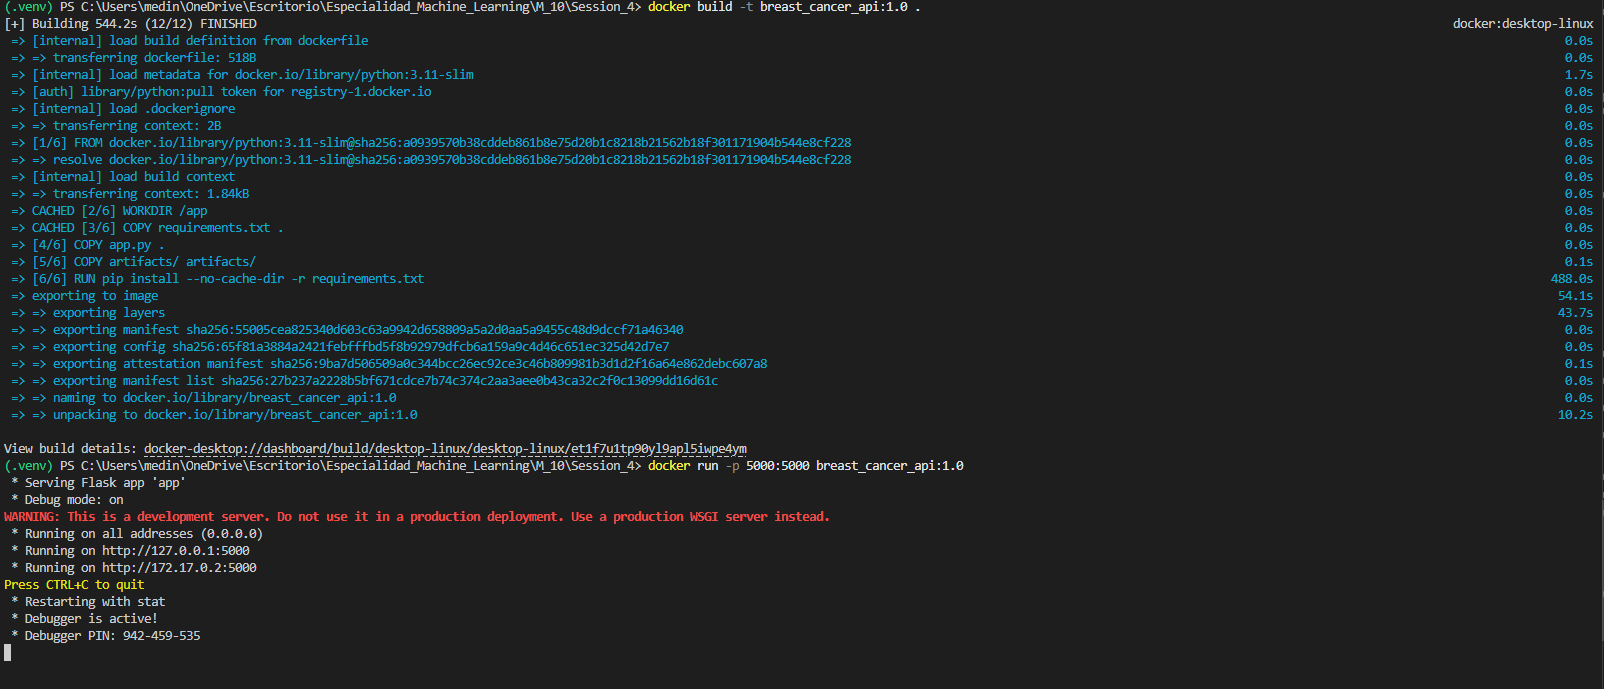

Pruebas

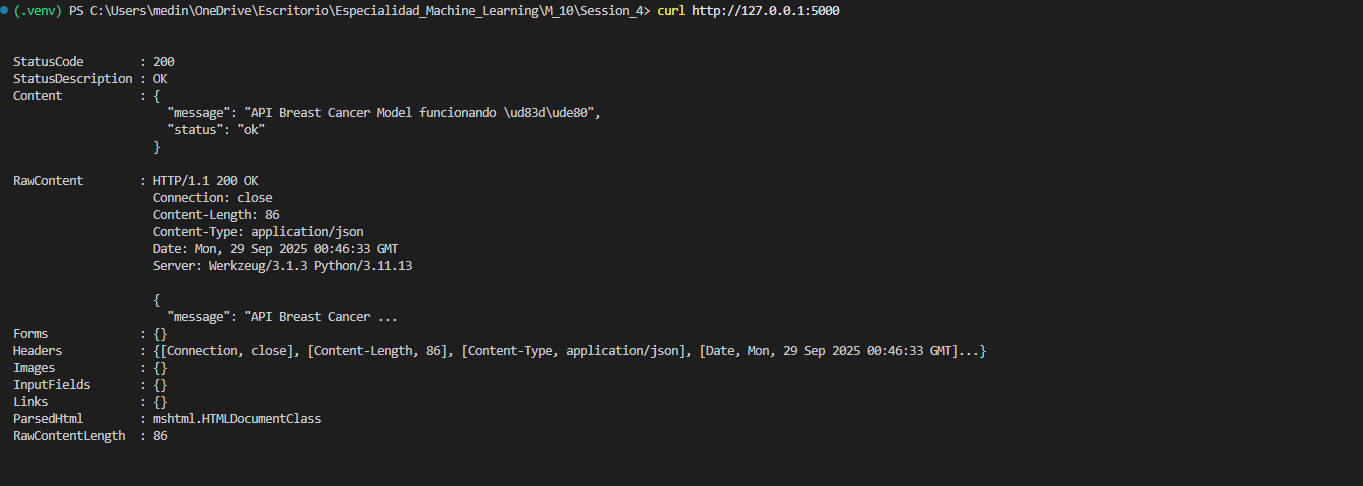

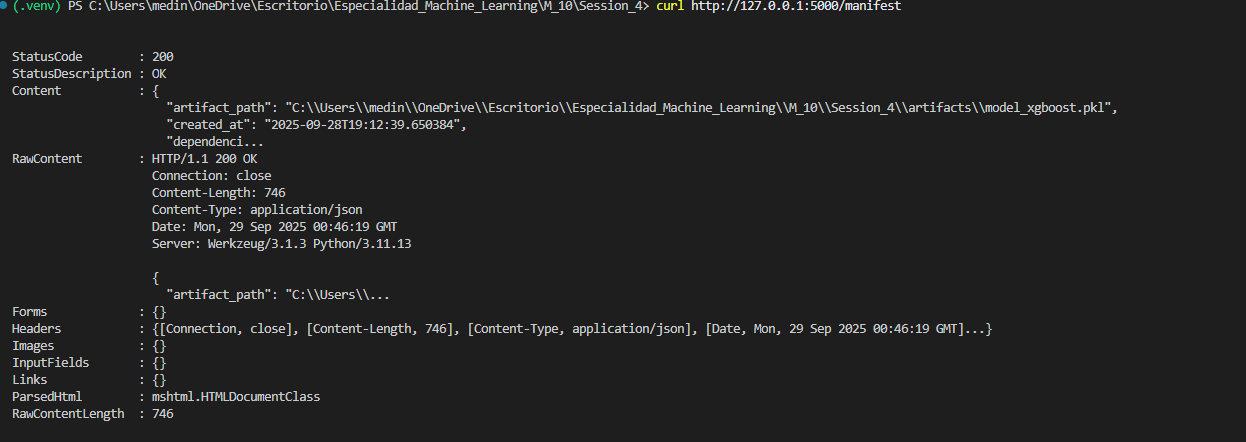

Pruebas locales usando Postman

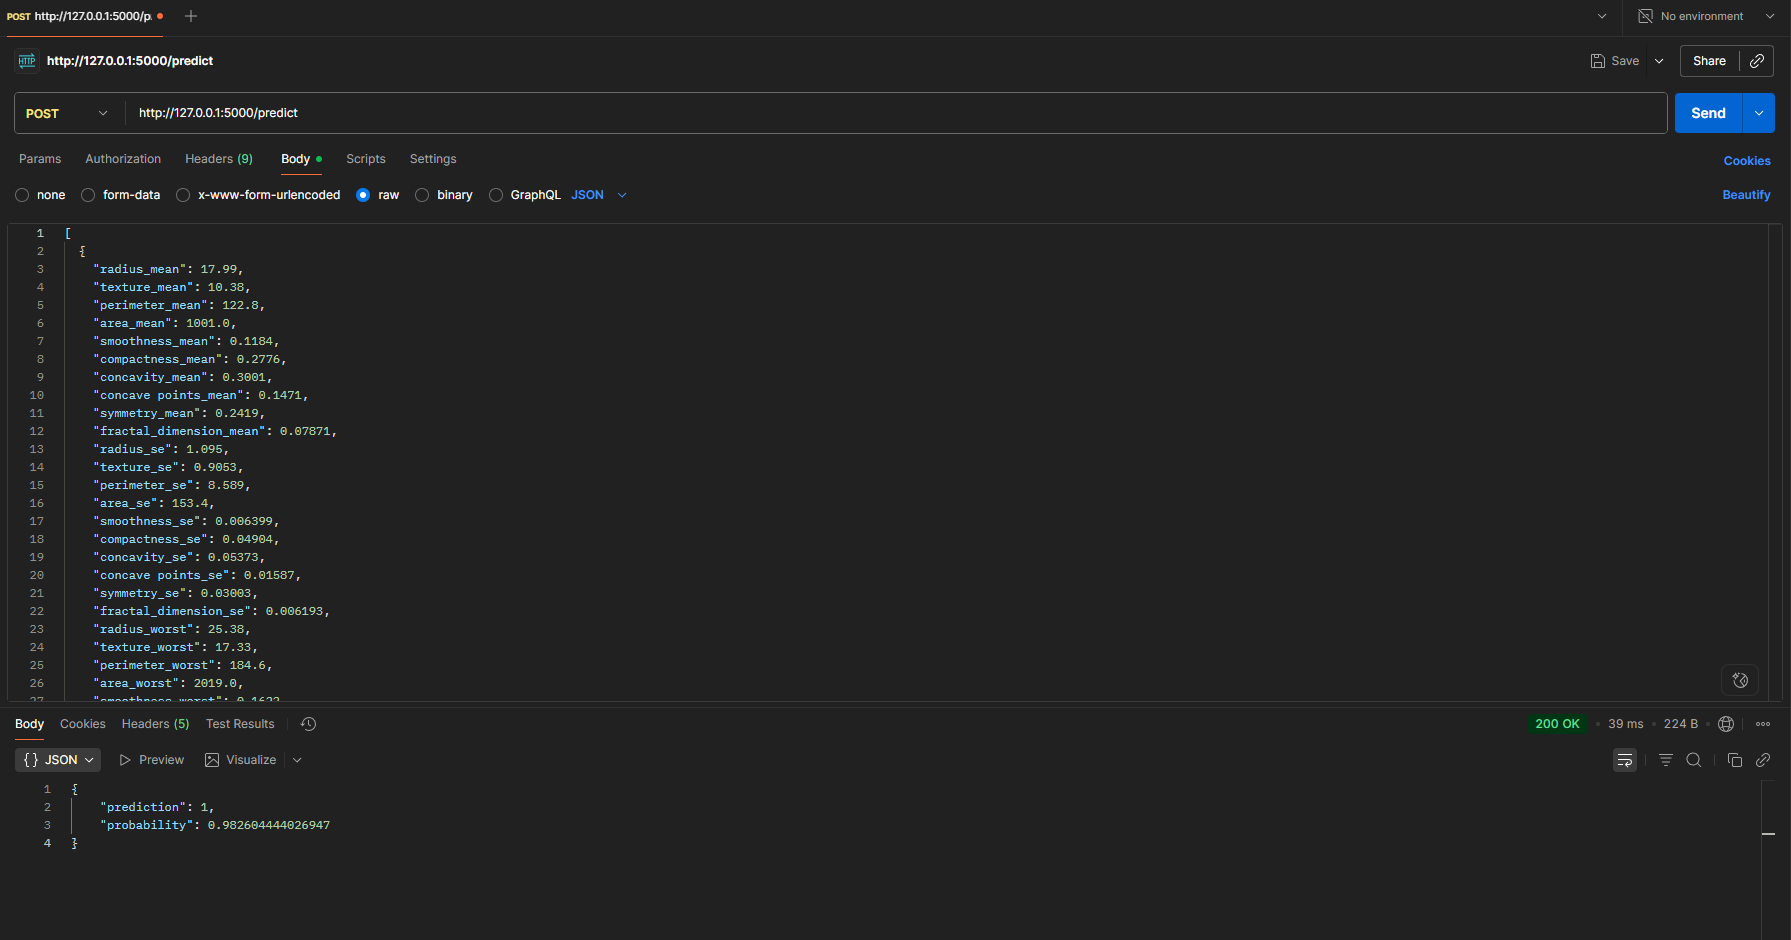

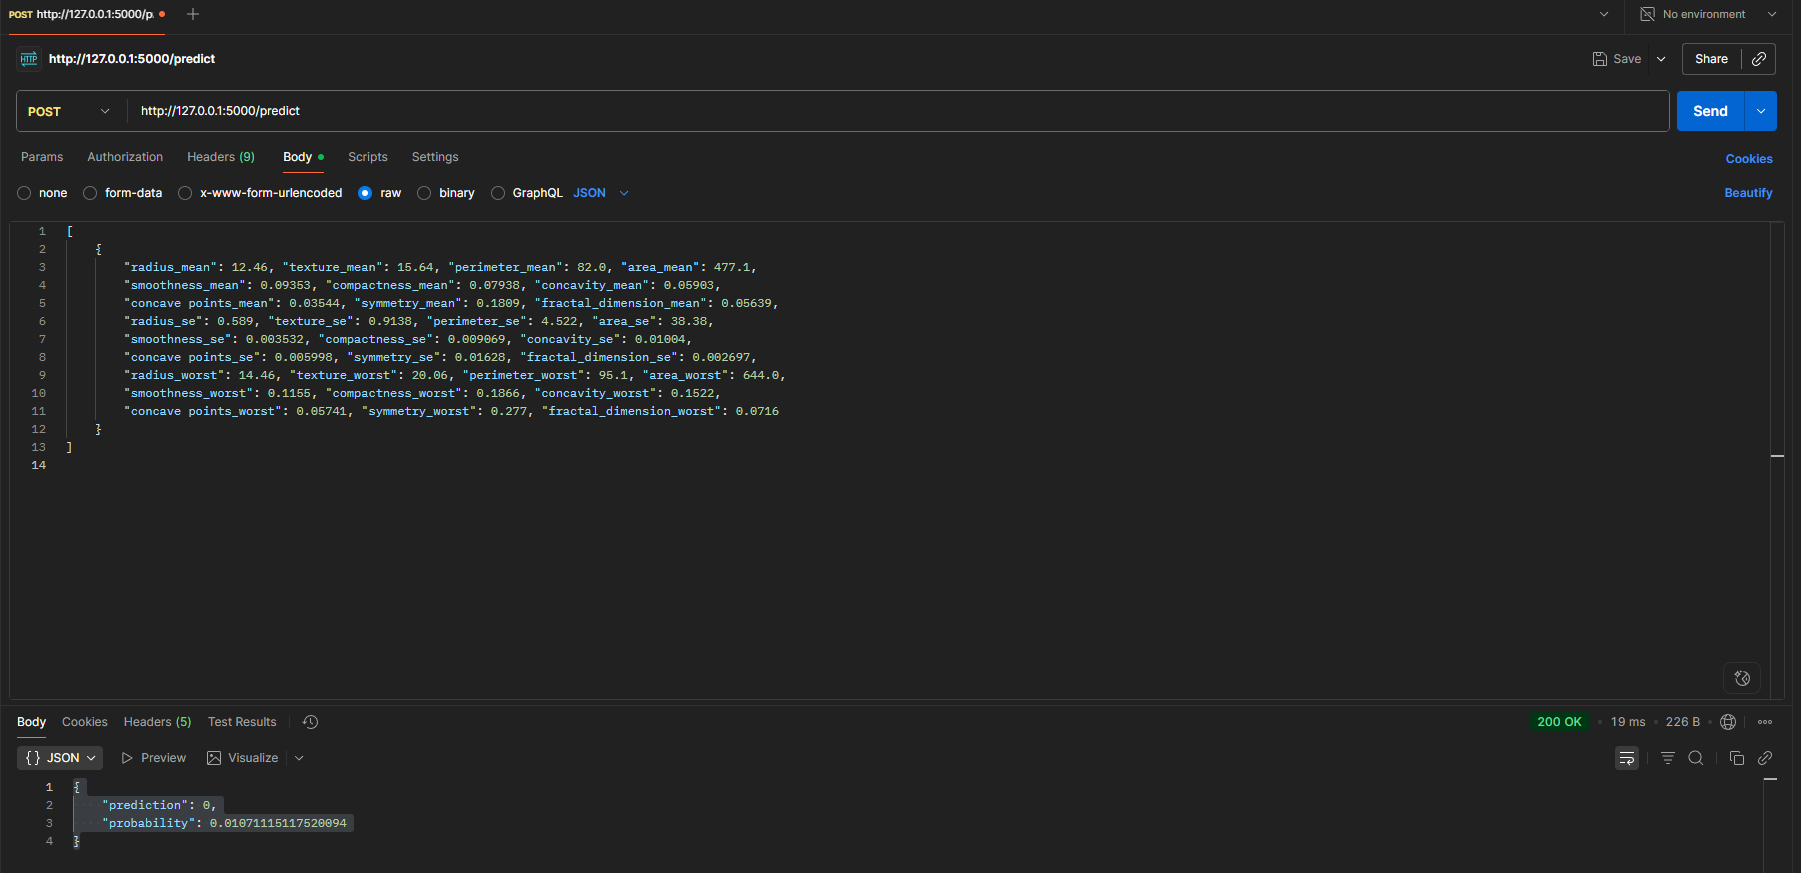

Probando Tests locales

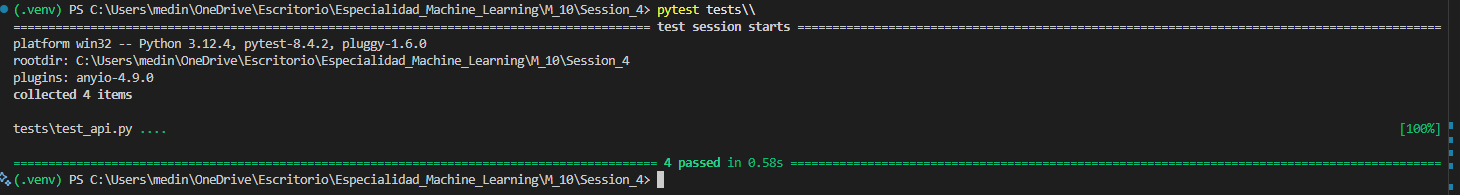

#### <span style="color:blue">4. CI/CD Automatizado (opcional, recomendado):</span>

- Workflow en GitHub Actions o GitLab CI. 
- Automatizar: build, test de endpoint básicos, push a registro. 